<h1 style="text-align: center; font-weight: bold; color: #102BBC; font-size:50px; font-family:Times;">Pennsylvania Accident Analysis</h1>  
<p style="text-align: center; font-size: 30px; font-weight:bold; color: #d4841c; font-family:Times;">By Garian Rice, 10/12/2022</p> 

<p style="text-align: center;">
          <img src="https://assets.weforum.org/article/image/large_ROr-ta0drr8J1OeWAolomILHaebTOGT-42_rre9axD4.JPG" />
</p>


<h1 style="font-weight: bold; color: #102BBC; font-size:45px; text-align: center; font-family:Times;">👋🏼 Introduction 👋🏼</h1> 

> <p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">"Data! Data! Data!"</span> cried Sherlock Holmes impatiently, <span style="color:#d4841c">"I can't make bricks without clay!"</span></p>
<p style="color: #102BBC;font-weight: bold;font-size:16px;">With my second project, I intend to demonstrate the awesome power of <span style="color:#d4841c">data mining:</span> the art of extracting useful and interesting insights from data, much like putting on special glasses that see invisible ink.</p> 
<p style="color: #102BBC;font-weight: bold;font-size:16px;">Our new glasses will enable us to visualize <span style="color:#d4841c">car accidents</span> in the state I've lived in half my life, <span style="color:#d4841c">Pennsylvania,</span> for the benefit of everyone's safety, awareness and curiosity.</p>
<p style="color: #102BBC;font-weight: bold;font-size:16px;">The data comes from Kaggle. More information and links below.</p>

<h3 style="font-weight: bold; color: #d4841c; font-size: 35px; font-family:Times;">Description</h3> 

> <p style="color: #102BBC;font-weight: bold;font-size:16px;">"This is a countrywide car accident dataset, which covers <span style="color:#d4841c">49 states of the USA</span>. The accident data are collected from <span style="color:#d4841c">February 2016 to Dec 2021</span> using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about <span style="color:#d4841c">2.8 million accident records</span> in this dataset."
<br><a href="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?datasetId=199387&sortBy=voteCount" target="_blank">Source (opens in new tab)</a></p>

<h3 style="font-weight: bold; color: #d4841c; font-size: 35px; font-family:Times;">Inspiration</h3>  

> <p style="color: #102BBC;font-weight: bold;font-size:16px;">"US Accidents can be used for numerous applications such as real-time car <span style="color:#d4841c">accident prediction</span>, studying car accidents <span style="color:#d4841c">hotspot locations</span>, <span style="color:#d4841c">casualty analysis</span> and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other <span style="color:#d4841c">environmental stimuli</span> on accident occurrence. The most recent release of the dataset can also be useful to study the impact of <span style="color:#d4841c">COVID-19</span> on traffic behavior and accidents."  
<br><a href="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?datasetId=199387&sortBy=voteCount" target="_blank">Source (opens in new tab)</a></p>



<h3 style="font-weight: bold; color: #102BBC; font-size:45px; text-align: center; font-family:Times;">⚙️ Processing ⚙️</h3> 
<p></p>

<p style="color: #102BBC;font-weight: bold;font-size:16px;">Fortunately the data has been cleaned already. So we can just create a <span style="color:#d4841c">subset</span> of accidents in Pennsylvania and convert start/end times into <span style="color:#d4841c">datetime format</span> for later analysis.</p>

In [1]:
# Importing the usual suspects
import numpy as np
import pandas as pd

# Getting data name using Kaggle notebook
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Importing data as pandas dataframe
accidents = pd.read_csv("accidents.csv")
# Filtering to Pennsylvania accidents 
pa = accidents[accidents["State"]=="PA"]

In [12]:
# Converting start/end times into proper type
pa.Start_Time = pd.to_datetime(pa.Start_Time)
pa.End_Time = pd.to_datetime(pa.End_Time);

/var/folders/bx/qntgbk216cdg44yv25k_qk1c0000gn/T/ipykernel_4898/2853952193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa.Start_Time = pd.to_datetime(pa.Start_Time)
/var/folders/bx/qntgbk216cdg44yv25k_qk1c0000gn/T/ipykernel_4898/2853952193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa.End_Time = pd.to_datetime(pa.End_Time);


In [3]:
print('There were',pa.shape[0],'traffic accidents in Pennsylvania from',np.datetime64(min(pa.Start_Time)).astype(object).year,'to',np.datetime64(max(pa.End_Time)).astype(object).year)

There were 99975 traffic accidents in Pennsylvania from 2016 to 2021


<h3 style="font-weight: bold; color: #102BBC; font-size:40px; text-align: center; font-family:Times;">🌎 Accident Hotspots 🌎</h3> 
<p style="color: #102BBC;font-weight: bold;font-size:16px;">Let's take a look at the locations of these nearly <span style="color:#d4841c">100,000</span> accidents. First we'd like to see the <span style="color:#d4841c">ten cities</span> with the highest number of accidents</p>

In [4]:
# Create a new dataframe with head of number of accidents in each city; rename column and index.
cities = pd.DataFrame(pa['City'].value_counts()).reset_index().rename(columns={'index':'City','City':'Cases'})
top_10_cities = pd.DataFrame(cities.head(10))

Fontconfig warning: ignoring UTF-8: not a valid region tag


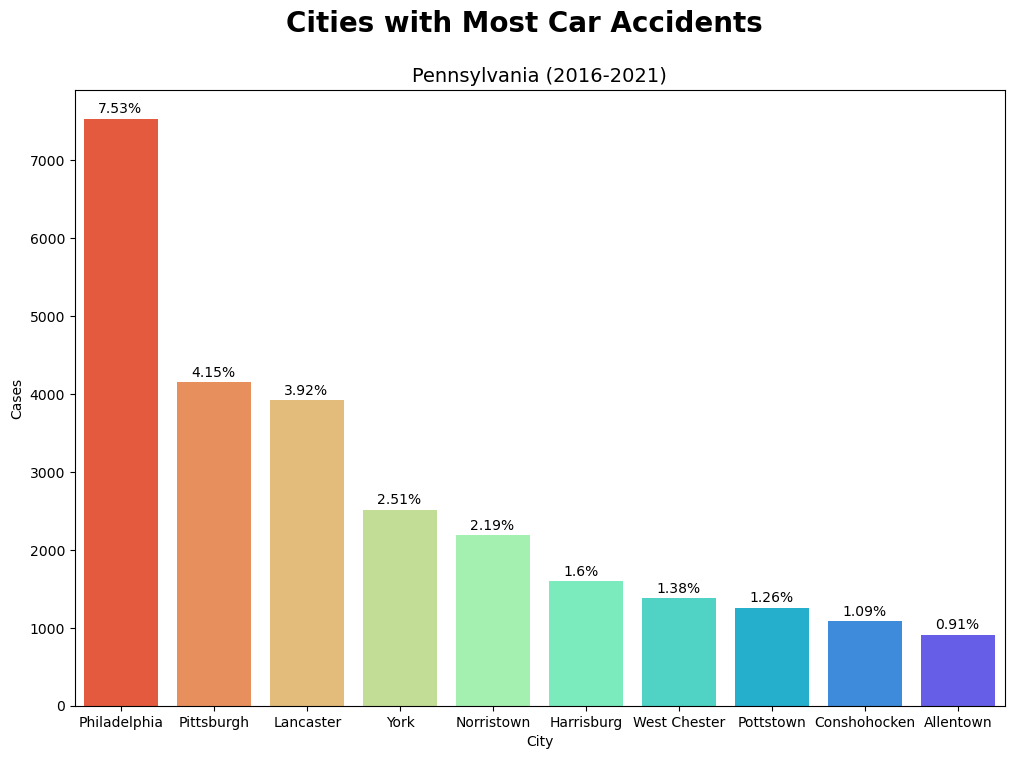

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8)) #Setting the height, width of plot
ax = sns.barplot(y=top_10_cities['Cases'],x=top_10_cities['City'],palette='rainbow_r') #_r for reverse palette
for i in ax.patches: # For each bar, adjust the position of text a bit then calculate percentage
    ax.text(i.get_x()+0.15, i.get_height()+75, \
           str(round((i.get_height()/sum(cities['Cases']))*100,2))+'%')

plt.suptitle('Cities with Most Car Accidents', size=20, fontweight="bold")
plt.title('Pennsylvania (2016-2021)',size=14)
plt.show()

In [6]:
# Because I didn't feel like adding these 10 percentages by hand
total_percent = 0 # Need to reset value each time
some_cities = ["Philadelphia","Pittsburgh","Lancaster","York","Norristown","Harrisburg","West Chester","Pottstown","Conshohocken","Allentown"]
for city in some_cities:
    total_percent += round(pa[pa["City"]==city].shape[0]/pa.shape[0]*100,1)
print("These 10 cities comprise",total_percent,"% of total accidents in PA from 2016 to 2021.")

These 10 cities comprise 26.6 % of total accidents in PA from 2016 to 2021.


<span style="font-weight: bold; color: #102BBC; font-size:30px; font-family:Times;">💡 Insights</span> 

<ol>
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">Allentown</span> is in the top 10 although <span style="color:#d4841c">less than 1%</span> of accidents occured there.</li>
    <li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">7.53%</span> of accidents came from <span style="color:#d4841c">Philedelphia</span>, nearly <span style="color:#d4841c">twice</span> that of <span style="color:#d4841c">Pittsburgh</span>, the second highest, followed by <span style="color:#d4841c">Lancaster</span></p></li>
    <li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">26.6%</span> of accidents occured in the <span style="color:#d4841c">10</span> hotspots.</p></li>
    <li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;">Harrisburg, <span style="color:#d4841c">the capital</span>, has the <span style="color:#d4841c">6th highest</span> number of accidents</p></li>
</ol>

<p style="color: #102BBC;font-weight: bold;font-size:16px;">Now we can get a look at the location of accidents throughout the <span style="color:#d4841c">state</span> using <span style="color:#d4841c">longitude</span> and <span style="color:#d4841c">lattitude</span> coordinates</p>

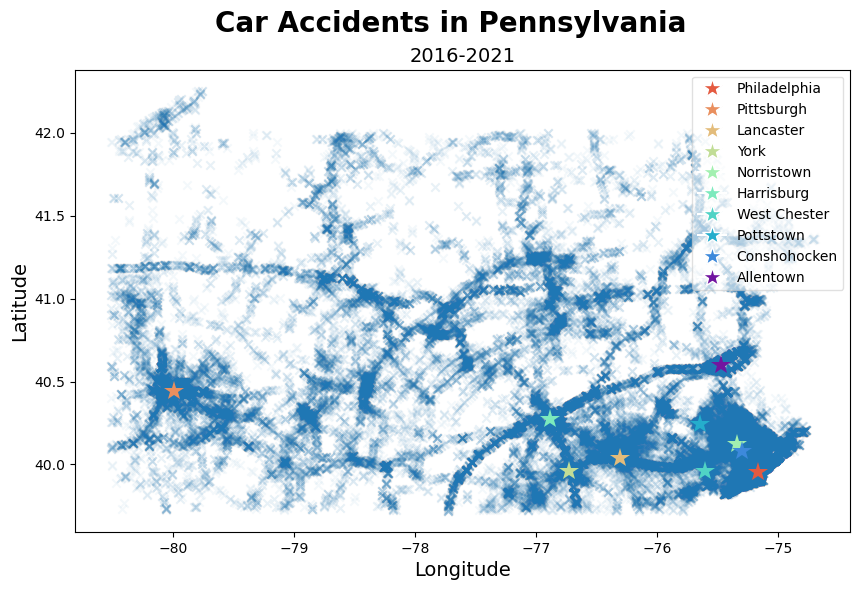

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

legend_elements =[Line2D([0], [0], marker='*',  color='w', label='Philadelphia',
                          markerfacecolor='#e45a40', markersize=15),
                 Line2D([0], [0], marker='*',  color='w', label='Pittsburgh',
                          markerfacecolor='#e98f5e', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Lancaster',
                          markerfacecolor='#e3bc7b', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='York',
                          markerfacecolor='#c1dd96', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Norristown',
                          markerfacecolor='#a2f0b0', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Harrisburg',
                          markerfacecolor='#7ceabd', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='West Chester',
                          markerfacecolor='#50d3c5', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Pottstown',
                          markerfacecolor='#25adcc', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Conshohocken',
                          markerfacecolor='#3d89db', markersize=15),
                 Line2D([0], [0], marker='*', color='w', label='Allentown',
                          markerfacecolor='#7215a0', markersize=15)]

import requests
plt.figure(figsize=(10,6))
plt.scatter(pa.Start_Lng,pa.Start_Lat,alpha=0.05,marker="x")
plt.suptitle('Car Accidents in Pennsylvania',size=20,fontweight="bold")
plt.title('2016-2021', size=14)
plt.ylabel('Latitude',size=14)
plt.xlabel('Longitude',size=14)
plt.plot(-75.1652, 39.9526, marker="*", markersize=15, mfc="#e45a40",mew=0.0)# Philly
plt.plot(-79.9959, 40.4406, marker="*", markersize=15,mfc="#e98f5e",mew=0.0)# Pitt
plt.plot(-76.3055, 40.0379, marker="*", markersize=15,mfc="#e3bc7b",mew=0.0)# Lancaster
plt.plot(-76.7277, 39.9626, marker="*", markersize=15,mfc="#c1dd96",mew=0.0)# York
plt.plot(-75.3399, 40.1215, marker="*", markersize=15, mfc="#a2f0b0",mew=0.0)# Norristown
plt.plot(-76.8867, 40.2732, marker="*", markersize=15, mfc="#7ceabd",mew=0.0)# Harrisburg
plt.plot(-75.6055, 39.9607, marker="*", markersize=15, mfc="#50d3c5",mew=0.0)# West Chester
plt.plot(-75.6496, 40.2454, marker="*", markersize=15, mfc="#25adcc",mew=0.0)# Pottstown
plt.plot(-75.3016, 40.0793, marker="*", markersize=15, mfc="#3d89db",mew=0.0)# Conshohocken
plt.plot(-75.4714, 40.6023, marker="*", markersize=15, mfc="#7215a0",mew=0.0)# Allentown
plt.legend(handles=legend_elements, loc='upper right', fontsize=10,framealpha=0.6)

plt.show()

<span style="font-weight: bold; color: #102BBC; font-size:30px; font-family:Times;">💡 Insights</span> 
     
<ol start="5">
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">9</span> of the top <span style="color:#d4841c">10 cities</span> were in the <span style="color:#d4841c">southeast.</span></p></li>
</ol>

<h3 style="font-weight: bold; color: #102BBC; font-size:40px; text-align: center; font-family:Times;">⏱ Time Analysis ⏱</h3> 
<p style="color: #102BBC;font-weight: bold;font-size:16px;">Now it's natural to wonder at what <span style="color:#d4841c">time</span> these accidents occured. To do this, we'll need to group the datetime data into <span style="color:#d4841c">periods</span>. Then a <span style="color:#d4841c">piechart</span> showing proportions and a <span style="color:#d4841c">barplot</span> showing counts will be presented.

In [8]:
pa['Period'] = (pa['Start_Time'].dt.hour % 24 + 4) // 4
pa['Period'].replace({1: 'Late Night', # 12 - 4
                     2: 'Early Morning', # 4 - 8
                     3: 'Morning', # 8 - 12
                     4: 'Noon', # 12 - 4
                     5: 'Evening', # 4 - 8
                     6: 'Night'}, inplace=True) # 8 - 12

/var/folders/bx/qntgbk216cdg44yv25k_qk1c0000gn/T/ipykernel_4898/3665075722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['Period'] = (pa['Start_Time'].dt.hour % 24 + 4) // 4
/var/folders/bx/qntgbk216cdg44yv25k_qk1c0000gn/T/ipykernel_4898/3665075722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['Period'].replace({1: 'Late Night', # 12 - 4


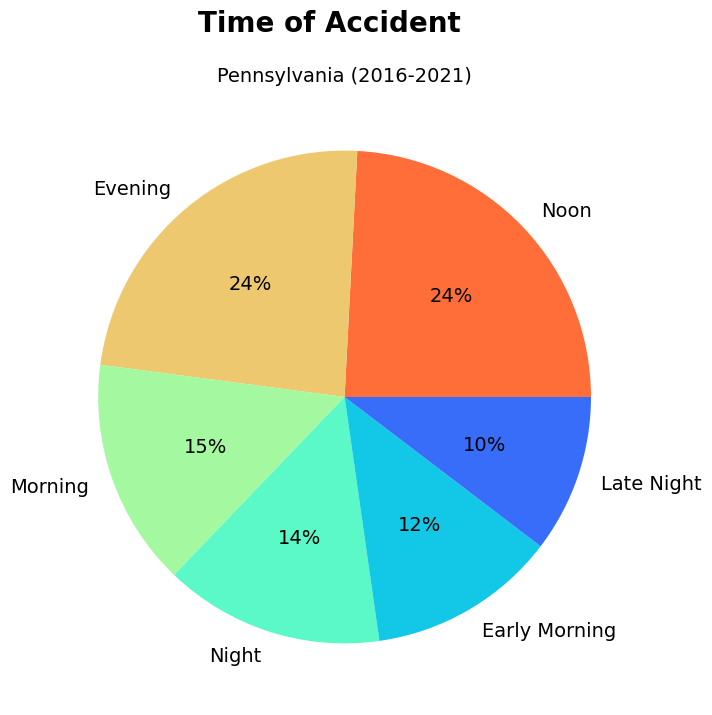

In [9]:
periods = pd.DataFrame(pa['Period'].value_counts()).reset_index().rename(columns={'index':'Period','Period':'Cases'})
plt.figure(figsize=(12,8))
plt.pie(x=periods['Cases'],labels=periods["Period"],autopct='%.0f%%',
        colors=sns.color_palette("rainbow_r"),textprops={'fontsize': 14})
plt.suptitle('Time of Accident', size=20, fontweight="bold")
plt.title('Pennsylvania (2016-2021)',size=14)
plt.show()

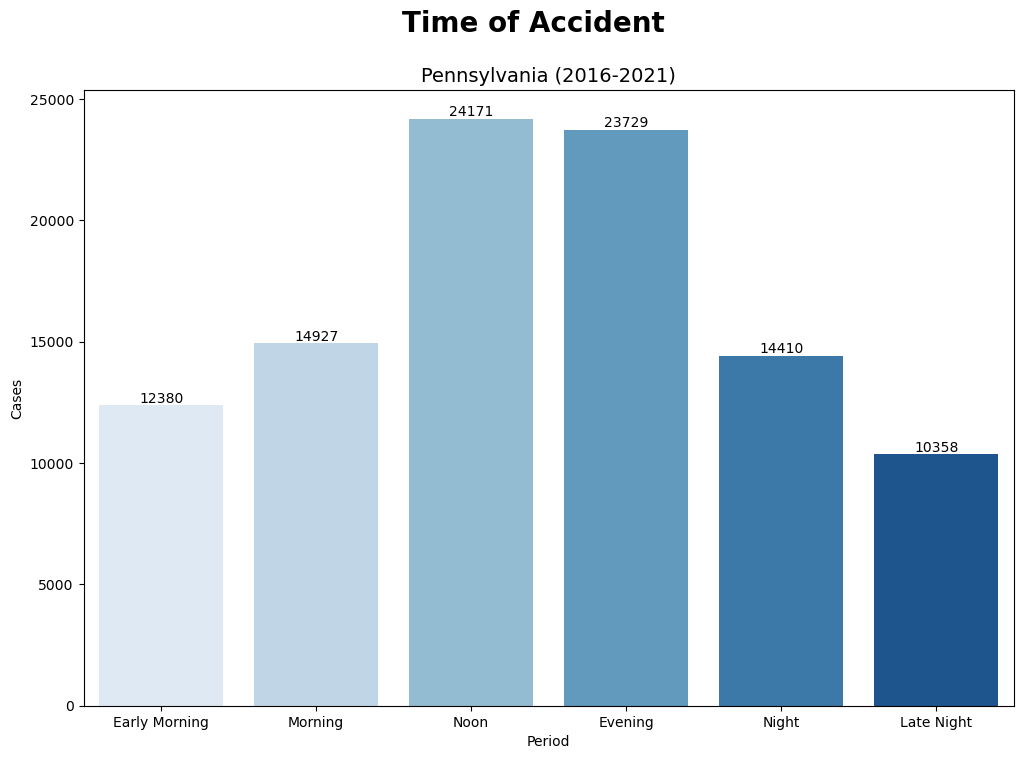

In [10]:
pal = sns.color_palette("YlOrBr")
order_list = ["Early Morning","Morning","Noon","Evening","Night","Late Night"]

plt.figure(figsize=(12,8)) 
ax = sns.barplot(y=periods['Cases'],x=periods['Period'],palette='Blues', order=order_list) 
plt.suptitle('Time of Accident', size=20, fontweight="bold")
plt.title('Pennsylvania (2016-2021)',size=14)
for i in ax.containers: # Display cases above bars
    ax.bar_label(i,)
plt.show()

<span style="font-weight: bold; color: #102BBC; font-size:30px; font-family:Times;">💡 Insights</span> 
     
<ol start="6">
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">Noon</span> and <span style="color:#d4841c">Evening</span> comprise nearly <span style="color:#d4841c">half</span> of all accidents.</p></li>
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">28%</span> of accidents occured at night/late night <span style="color:#d4841c">(8pm-4am)</span>.</p></li>
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">63%</span> of accidents happened from 8am to 8pm.</p></li>
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">Late night</span> had the least number of accidents followed by <span style="color:#d4841c">early morning.</span></p></li>
</ol>
<p style="color: #102BBC;font-weight: bold;font-size:16px;">Now let's take a look at whether accidents have increased or decreased over the <span style="color:#d4841c">years.</span></p>

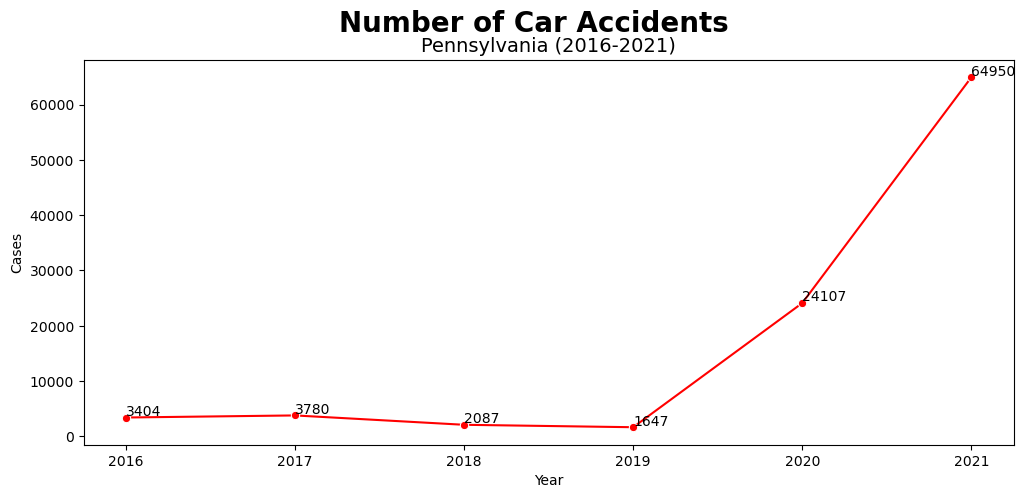

In [11]:
years = pd.DataFrame(pa.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
plt.figure(figsize=(12,5))
ax = sns.lineplot(data = years, marker='o', x='Year', y='Cases', color = 'red')
plt.suptitle('Number of Car Accidents', size=20, fontweight="bold")
plt.title('Pennsylvania (2016-2021)',size=14)

for x, y in zip(years['Year'],years['Cases']):
    plt.text(x=x, y=y+350,s='{:.0f}'.format(y))
plt.show()

<p style="color: #102BBC;font-weight: bold;font-size:16px;">When I first saw the lineplot above, I thought I made a mistake. However after double-checking with the Pennsylvania <span style="color:#d4841c">Department of Transportation's</span> annual reports, these findings to appear to be legitimate, whence we derive the following surprising insights: </p>

<span style="font-weight: bold; color: #102BBC; font-size:30px; font-family:Times;">💡 Insights</span> 
     
<ol start="10">
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;">Accidents have <span style="color:#d4841c">increased</span> by <span style="color:#d4841c">169%</span> since the start of COVID <span style="color:#d4841c">2020-2021</span></p></li>
<li style="color: #102BBC;font-weight: bold;font-size:20px;"><p style="color: #102BBC;font-weight: bold;font-size:16px;"><span style="color:#d4841c">2020</span> and <span style="color:#d4841c">2021</span> account for <span style="color:#d4841c">89%</span> of accidents from <span style="color:#d4841c">2016-2021</span>.</p></li>
</ol>

<h3 style="font-weight: bold; color: #102BBC; font-size:40px; text-align: center; font-family:Times;">✏️ Conclusion ✏️</h3> 
<p style="color: #102BBC;font-weight: bold;font-size:16px;">
    
    Now it's natural to wonder at what <span style="color:#d4841c">time</span> these accidents occured. To do this, we'll need to group the datetime data into <span style="color:#d4841c">periods</span>. Then a <span style="color:#d4841c">piechart</span> showing proportions and a <span style="color:#d4841c">barplot</span> showing counts will be presented.